# Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from scipy.special import i0
from numpy import exp, sin, cos
import seaborn as sns
import matplotlib as mpl
import os
from pathlib import Path
from statsFuncs import mean_confidence_interval
import scipy

mpl.rcParams['axes.linewidth'] = 2

# Paths

In [2]:
fig5_path = os.getcwd()
figures_path = str(Path(fig5_path).parent)
datapath = figures_path + '/data/naive_subjects/05_13/yes removal yes correction/'

# Plot params 

In [3]:
mpl.rcParams['xtick.major.size'] = 6
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['ytick.major.size'] = 6
mpl.rcParams['ytick.major.width'] = 2
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['font.serif'] = 'Myriad Pro'
mpl.rcParams['font.weight'] = 'medium'
mpl.rcParams['font.size'] = 16
mpl.rcParams['axes.labelweight'] = 'medium'

# Subject loop 

In [4]:
files = folders = 0

for _, dirnames, filenames in os.walk(datapath):
  # ^ this idiom means "we won't be using this value"
    files += len(filenames)
    folders += len(dirnames)

print("{:,} files, {:,} folders".format(files, folders))
print(str(folders-1) + ' subjects')
nSubjects = folders-1

127 files, 21 folders
20 subjects


In [5]:
subject_names = ['AR', 'AS', 'CAN', 'CG', 'CK', 'CT', 'EK', 'ES', 'EW', 'HE', 'HL', 'HOL', 'HY', 'IS', 'JP', 'MF', 'NC','SA', 'SK', 'SS']

## Calculate mean and errorr bars 

In [6]:
alldata_trimed = pd.DataFrame()
alldata = pd.DataFrame(columns=['SUBJECT', 'RUNNING_MEAN'])

row = 0
for subject in subject_names:
    print(subject)

    subjectdata_temp = pd.DataFrame()
    
    # load data:
    subjectdata_complete = pd.read_csv(datapath + subject + '/' + subject + '_VM_output_1nBack.csv')
    
    subjectdata_temp['Running_Mean'] = subjectdata_complete['Running_Mean'].dropna()
    subjectdata_temp.loc[:, 'SUBJECT'] = subject
    
    alldata_trimed.loc[row,'SUBJECT'] = subject
    
    mean, sem_low, sem_up = mean_confidence_interval.mean_sem(subjectdata_temp['Running_Mean'])
    
    alldata_trimed.loc[row, 'AVERAGE_MEAN'] = mean
    alldata_trimed.loc[row, 'MEAN_SEM_LOW'] = sem_low
    alldata_trimed.loc[row, 'MEAN_SEM_UP'] = sem_up
    
    if subject == 'S1':
        alldata = subjectdata_temp
    else:
        alldata = pd.concat([alldata, subjectdata_temp])
    

    row += 1
    

AR
AS
CAN
CG
CK
CT
EK
ES
EW
HE
HL
HOL
HY
IS
JP
MF
NC
SA
SK
SS


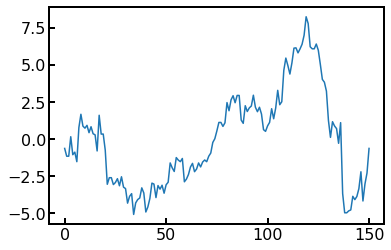

In [7]:
plt.plot(subjectdata_complete['Running_Mean'])

In [8]:
alldata = pd.DataFrame()

row = 0
for subject in subject_names:
    print(subject)

    subjectdata_temp = pd.DataFrame()
    
    # load data:
    subjectdata_complete = pd.read_csv(datapath + subject + '/' + subject + '_VM_output_1nBack.csv')
    
    alldata[subject] = subjectdata_complete['Running_Mean'].dropna()
        


AR
AS
CAN
CG
CK
CT
EK
ES
EW
HE
HL
HOL
HY
IS
JP
MF
NC
SA
SK
SS


In [26]:
for row in range(len(alldata)): # let's go calculating row by row
    mean, sem_low, sem_up = mean_confidence_interval.mean_sem(alldata.iloc[row, 0:nSubjects])
    alldata.loc[row, 'MEAN'] = mean
    alldata.loc[row, 'SEM_LOW'] = sem_low
    alldata.loc[row, 'SEM_UP'] = sem_up

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


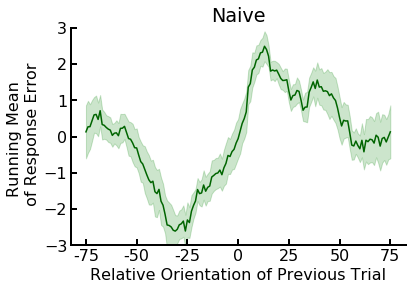

In [27]:
plt.plot(alldata['MEAN'], color='darkgreen')
plt.fill_between(range(len(alldata)), alldata['SEM_LOW'], alldata['SEM_UP'], facecolor="orange", color='green', alpha=0.2)
plt.ylabel('Running Mean \n of Response Error')
plt.xlabel('Relative Orientation of Previous Trial')
plt.ylim([-3, 3])
plt.yticks(np.arange(-3, 4, 1))
plt.xticks(np.arange(0, 151, 25), ('-75', '-50', '-25', '0', '25', '50', '75'))
sns.despine()
plt.title('Naive')
plt.savefig('AvgRunningMean_Radiologists.eps', bbox_inches='tight', dpi=1200)
plt.savefig('RunningMean_Radiologists.jpg', bbox_inches='tight', dpi=1200)